<a href="https://colab.research.google.com/github/NicolasKlaue/Perceptron-to-classify-iris-types/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.callbacks import TensorBoard
import numpy as np
import pandas as pd

iris = datasets.load_iris()
print(iris.target_names)
print(np.bincount(iris.target))
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
[50 50 50]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


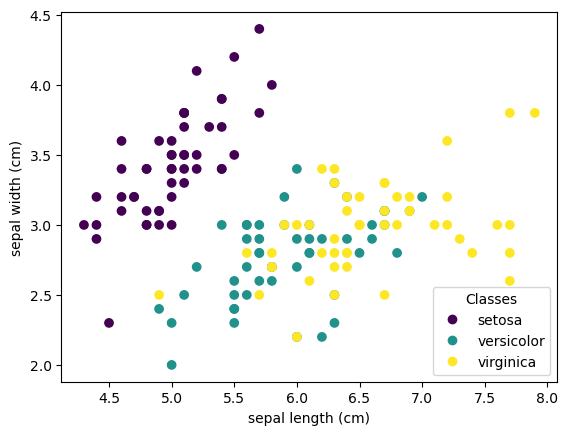

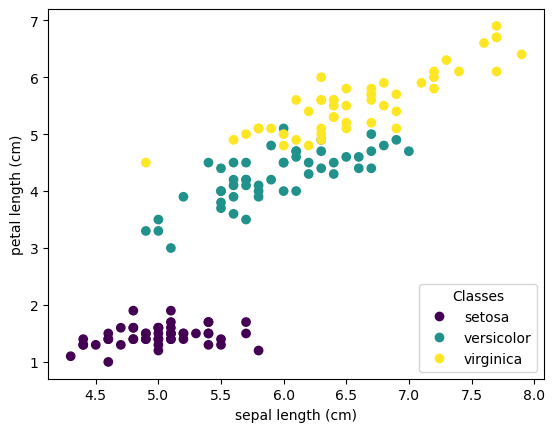

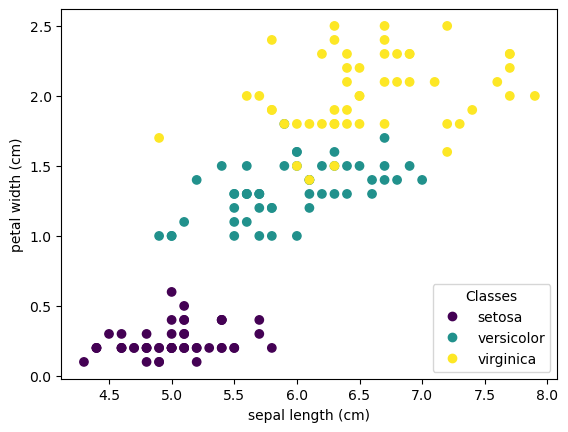

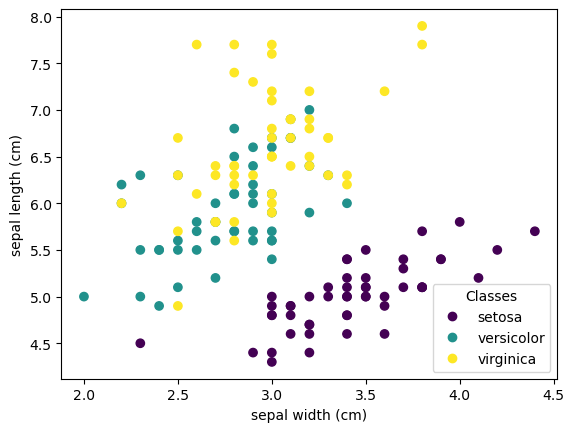

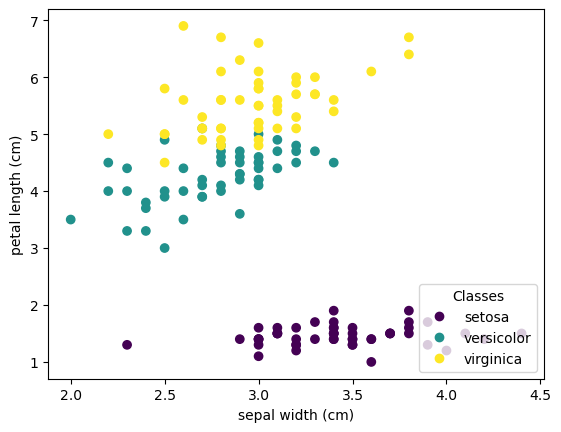

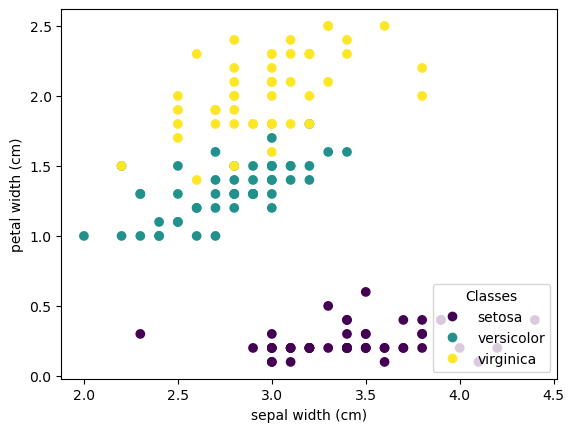

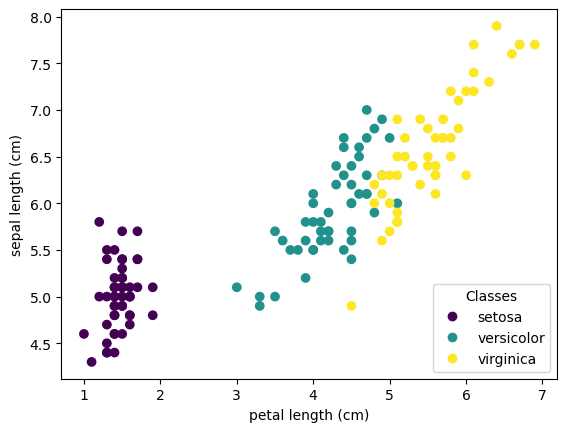

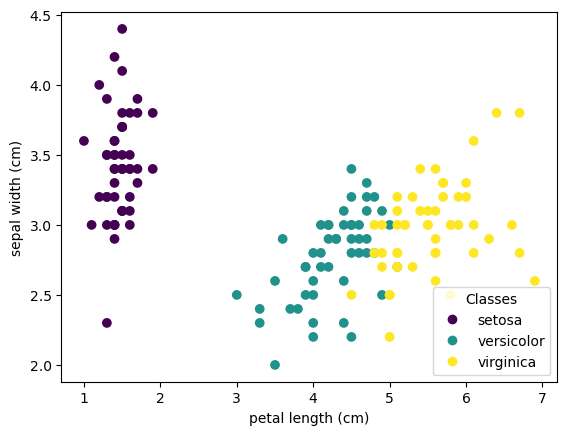

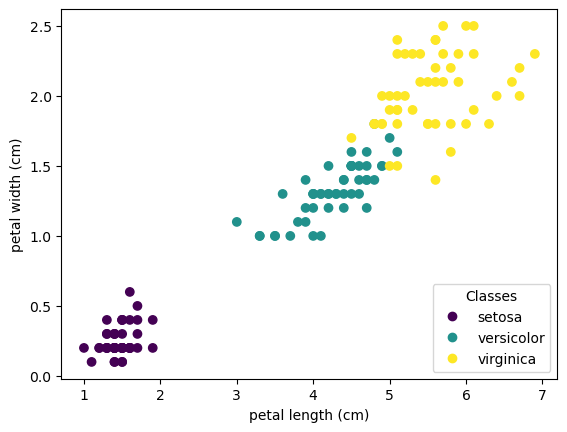

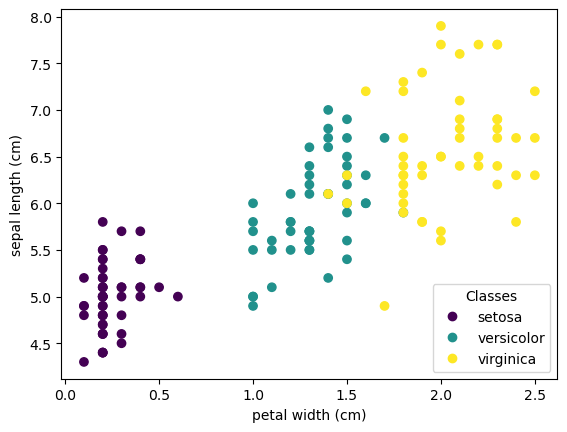

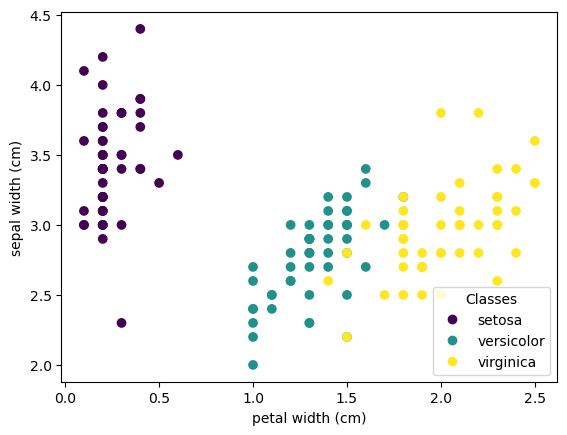

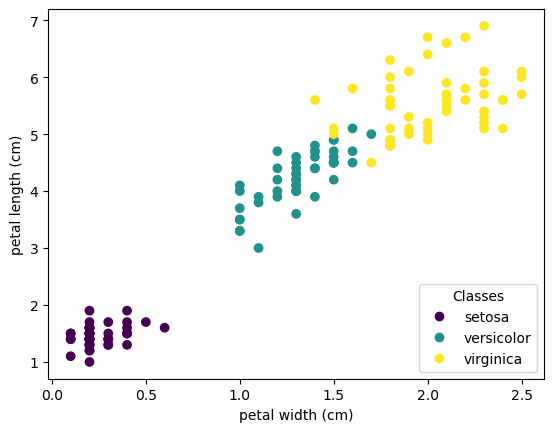

In [2]:
import matplotlib.pyplot as plt

for i in range(4):
  for j in range(4):
    if i != j:
      _, ax = plt.subplots()
      scatter = ax.scatter(
          iris.data[:, i], iris.data[:, j], c=iris.target)
      ax.set(xlabel=iris.feature_names[i],
             ylabel=iris.feature_names[j])
      _ = ax.legend(
          scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
        )

In [3]:
data, labels = iris.data, iris.target
#We have choosen to eliminate versicolor as we can only classify between two classes in a perceptron and Setosa and virginica are the easiest to classify based on petal width and lenght
versicolor_index = np.where(iris.target_names == "versicolor")[0][0]
filtered_data = [data[i] for i in range(len(data)) if labels[i] not in [versicolor_index]]
filtered_labels = [labels[i] for i in range(len(labels)) if labels[i] not in [versicolor_index]]

#Guarantee dimensionality of x is correct
filtered_data = [filtered_data[i][2:] for i in range(len(filtered_data))]


filtered_labels = [0 if label == 0 else 1 for label in filtered_labels]

#Division
setosa_index =0
setosa_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [setosa_index]]
setosa_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [setosa_index]]
setosa_filtered_data = tf.convert_to_tensor(setosa_filtered_data,np.float32)
setosa_filtered_labels =tf.expand_dims(tf.convert_to_tensor(setosa_filtered_labels,np.float32),axis=1)


virginica_index = 1
virginica_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [virginica_index]]
virginica_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [virginica_index]]
virginica_filtered_data = tf.convert_to_tensor(virginica_filtered_data,np.float32)
virginica_filtered_labels =tf.expand_dims(tf.convert_to_tensor(virginica_filtered_labels,np.float32),axis=1)


train_split,test_split = 0.7,0.3
setosa_X_train, setosa_X_test= tf.split(setosa_filtered_data,[int(setosa_filtered_data.shape[0]*train_split),int(setosa_filtered_data.shape[0]*test_split)])
setosa_y_train, setosa_y_test= tf.split(setosa_filtered_labels,[int(setosa_filtered_labels.shape[0]*train_split),int(setosa_filtered_labels.shape[0]*test_split)])

virginica_X_train, virginica_X_test= tf.split(virginica_filtered_data,[int(virginica_filtered_data.shape[0]*train_split),int(virginica_filtered_data.shape[0]*test_split)])
virginica_y_train, virginica_y_test= tf.split(virginica_filtered_labels,[int(virginica_filtered_labels.shape[0]*train_split),int(virginica_filtered_labels.shape[0]*test_split)])

#print(len(setosa_filtered_data))
#print(len(setosa_filtered_labels))
#print(len(virginica_filtered_data))
#print(len(virginica_filtered_labels))
#print("setosa_X_train shape:", setosa_X_train.shape)
#print("setosa_X_train type:", type(setosa_X_train))
#print("setosa_X_test shape:", setosa_X_test.shape)
#print("setosa_X_test type:", type(setosa_X_test))
#print("setosa_y_train shape:", setosa_y_train.shape)
#print("setosa_y_train type:", type(setosa_y_train))
#print("setosa_y_test shape:", setosa_y_test.shape)
#print("setosa_y_test type:", type(setosa_y_test))
#print("virginica_X_train shape:", virginica_X_train.shape)
#print("virginica_X_train type:", type(virginica_X_train))
#print("virginica_X_test shape:", virginica_X_test.shape)
#print("virginica_X_test type:", type(virginica_X_test))
#print("virginica_y_train shape:", virginica_y_train.shape)
#print("virginica_y_train type:", type(virginica_y_train))
#print("virginica_y_test shape:", virginica_y_test.shape)
#print("virginica_y_test type:", type(virginica_y_test))

In [4]:
X_test, X_train = tf.concat([setosa_X_test,virginica_X_test],0),tf.concat([setosa_X_train,virginica_X_train],0)
y_test, y_train = tf.concat([setosa_y_test,virginica_y_test],0),tf.concat([setosa_y_train,virginica_y_train],0)
#print("X_train shape:", X_train.shape)
#print("X_train type:", type(X_train))
#print("X_test shape:", X_test.shape)
#print("X_test type:", type(X_test))
#print("y_train shape:", y_train.shape)
#print("y_train type:", type(y_train))
#print("y_test shape:", y_test.shape)
#print("y_test type:", type(y_test))

In [5]:
class Step:

  def __init__(
          self,
          threshold=0):

    self.__threshold__ = threshold

  def transform(
          self,
          x):

    return 1 if x >= self.__threshold__ else 0


class Perceptron:

  def __init__(
          self,
          units,
          activation):

    self.weights = tf.Variable(
        tf.random.normal([units, 1], dtype=tf.float32))
    self.bias = tf.Variable(
        tf.zeros([1], dtype=tf.float32))

    self.activation = activation

  def predict(
          self,
          X):

    X = np.reshape(X, (self.weights.shape[1], self.weights.shape[0]))

    linear_output = np.zeros((X.shape[0], 1), dtype=np.float32)
    for i in range(X.shape[0]):
     for j in range(X.shape[1]):
          linear_output[i] += X[i][j] * self.weights[j]
     linear_output[i] += self.bias


    prediction = self.activation.transform(linear_output)

    return prediction

  def fit(
          self,
          X,
          y,
          epochs=10,
          learning_rate=0.01):

    for epoch in range(1, epochs):

      loss = 0

      for i in range(X.shape[0]):

        sample = np.reshape(
            X[i], (self.weights.shape[0], self.weights.shape[1]))

        prediction = self.predict(sample)
        error = y[i] - prediction
        loss += abs(error)

        # Compute deltas
        dweights = learning_rate * error * sample
        dbias = learning_rate * error

        self.weights.assign_add(dweights)
        self.bias.assign_add(dbias)
        if i == X.shape[0]-1:
             print("\n\nweights: "+ str(self.weights.numpy()) + "\n bias: " + str(self.bias.numpy()))

      loss /= X.shape[0]

      if (epoch % 1) == 0 or (epoch == epochs - 1):
        print(f"Epoch {epoch} with loss {loss}")

In [7]:
input_size = X_test.shape[1]
output_size = y_test.shape[1]

learning_rate = 0.01

perceptron = Perceptron(
    units=input_size,
    activation=Step())

perceptron.fit(
    X_train,
    y_train,
    epochs=60,
    learning_rate=learning_rate)



weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 1 with loss [0.24285714]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 2 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 3 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 4 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 5 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 6 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 7 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 8 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 9 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 10 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 11 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17]
Epoch 12 with loss [0.]


weights: [[0.05468642]
 [0.11564323]]
 bias: [-0.17

In [66]:
for i in range(X_train.shape[0]):
  result = perceptron.predict(X_train[i])
  print(str(int(X_train[i][0])) + ' and ' + str(int(X_train[i][1])) + " = " + str(result)  + " expected = " + str(y_train[i].numpy()[0]))

1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
6 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5

In [67]:
for i in range(X_test.shape[0]):

  result = perceptron.predict(X_test[i])

  input = X_test[i].numpy()
  result = "1" if result > 0.5 else "0"

  print(str(int(input[0])) + ' and ' + str(int(input[1])) + " = " + result + " expected = " + str(y_test[i].numpy()[0]))

1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 1 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
6 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
4 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0


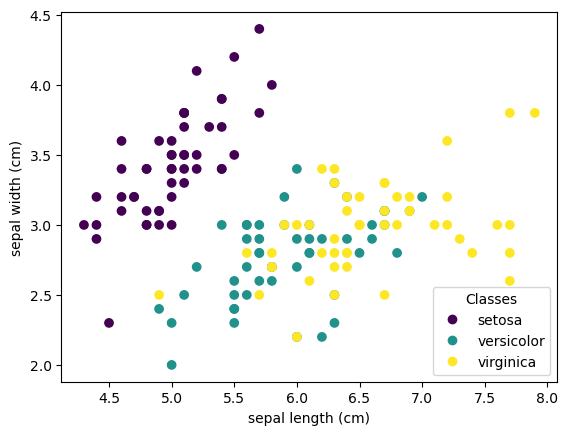

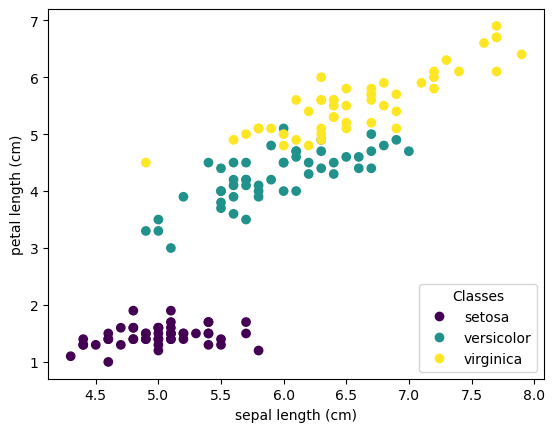

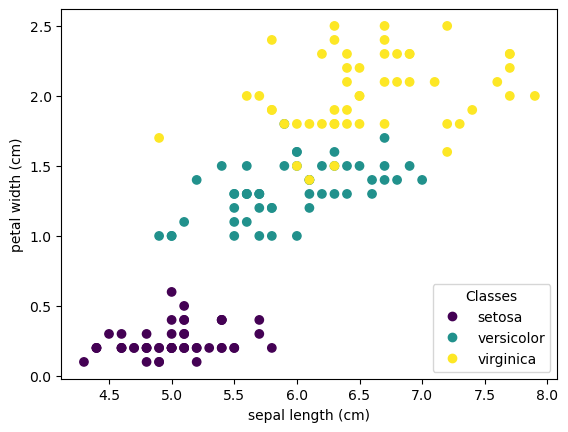

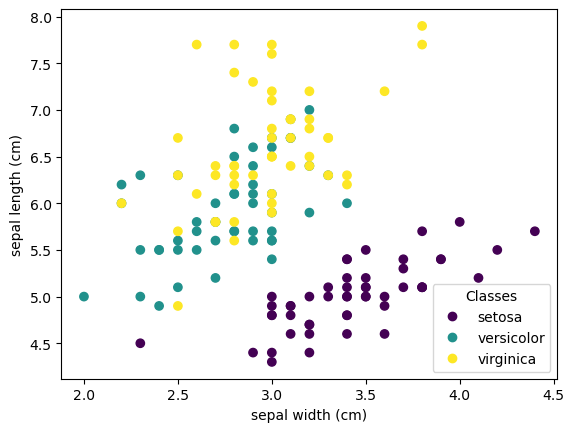

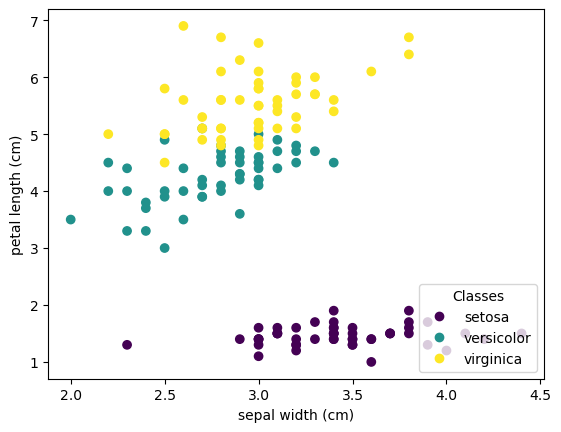

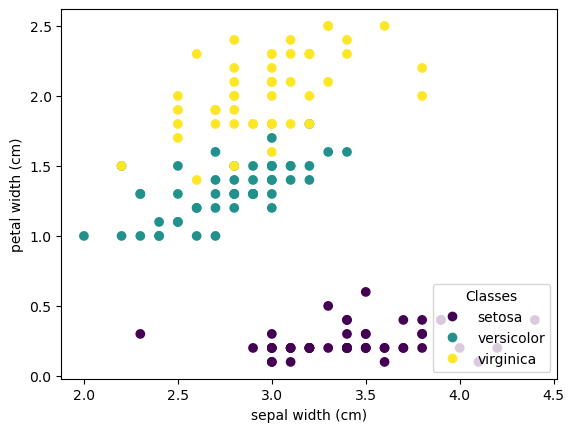

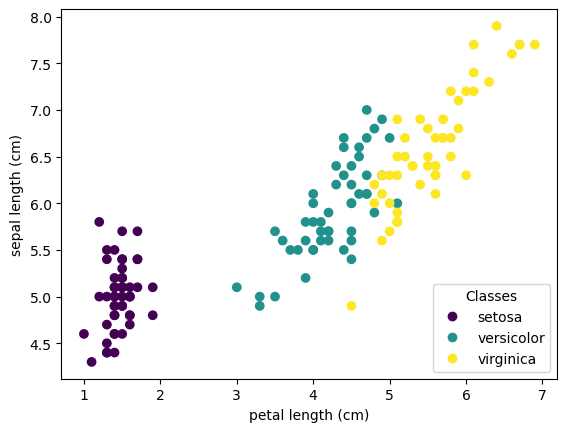

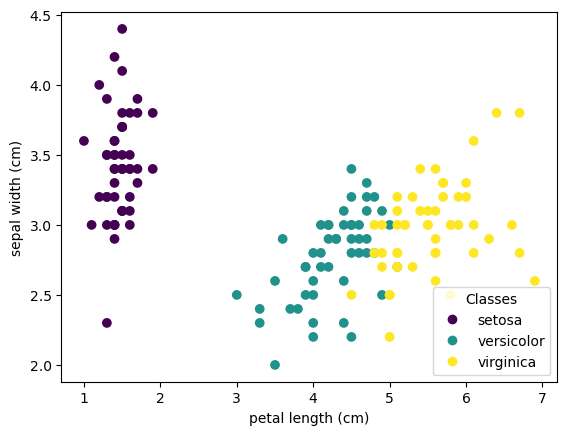

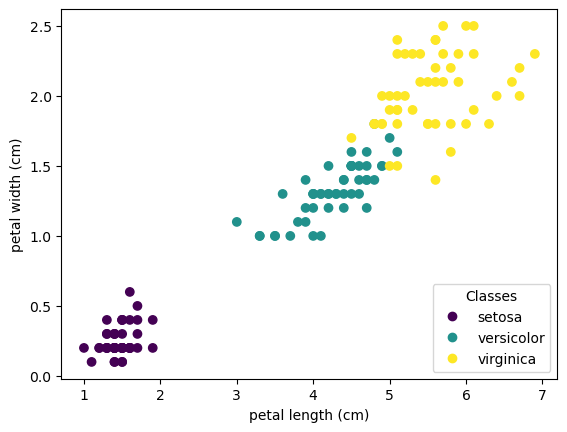

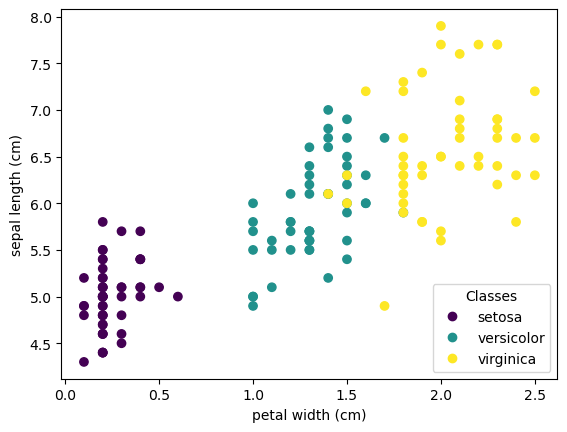

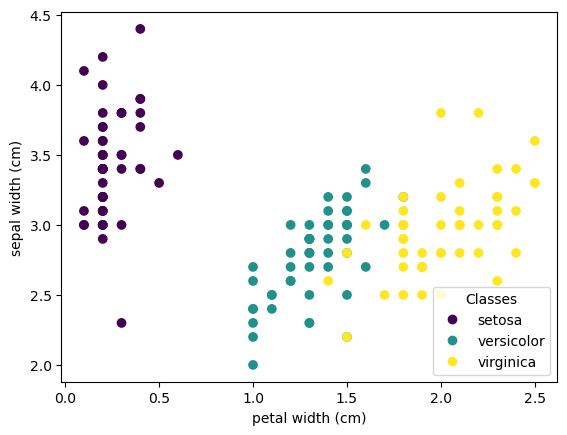

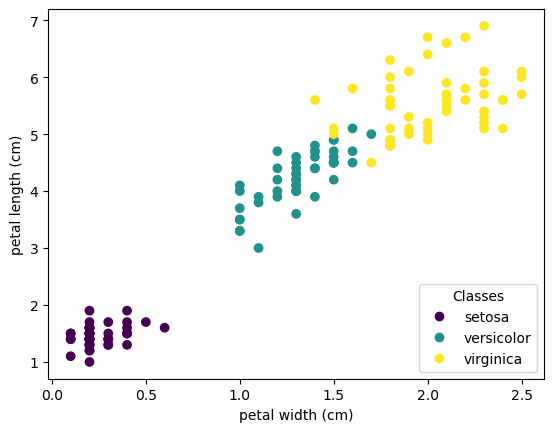

In [ ]:
import matplotlib.pyplot as plt

for i in range(4):
  for j in range(4):
    if i != j:
      _, ax = plt.subplots()
      scatter = ax.scatter(
          iris.data[:, i], iris.data[:, j], c=iris.target)
      ax.set(xlabel=iris.feature_names[i],
             ylabel=iris.feature_names[j])
      _ = ax.legend(
          scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
        )

In [ ]:
data, labels = iris.data, iris.target
#We have choosen to eliminate versicolor as we can only classify between two classes in a perceptron and Setosa and virginica are the easiest to classify based on petal width and lenght
versicolor_index = np.where(iris.target_names == "versicolor")[0][0]
filtered_data = [data[i] for i in range(len(data)) if labels[i] not in [versicolor_index]]
filtered_labels = [labels[i] for i in range(len(labels)) if labels[i] not in [versicolor_index]]

#Guarantee dimensionality of x is correct
filtered_data = [filtered_data[i][2:] for i in range(len(filtered_data))]


filtered_labels = [0 if label == 0 else 1 for label in filtered_labels]

#Division
setosa_index =0
setosa_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [setosa_index]]
setosa_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [setosa_index]]
setosa_filtered_data = tf.convert_to_tensor(setosa_filtered_data,np.float32)
setosa_filtered_labels =tf.expand_dims(tf.convert_to_tensor(setosa_filtered_labels,np.float32),axis=1)


virginica_index = 1
virginica_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [virginica_index]]
virginica_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [virginica_index]]
virginica_filtered_data = tf.convert_to_tensor(virginica_filtered_data,np.float32)
virginica_filtered_labels =tf.expand_dims(tf.convert_to_tensor(virginica_filtered_labels,np.float32),axis=1)


train_split,test_split = 0.7,0.3
setosa_X_train, setosa_X_test= tf.split(setosa_filtered_data,[int(setosa_filtered_data.shape[0]*train_split),int(setosa_filtered_data.shape[0]*test_split)])
setosa_y_train, setosa_y_test= tf.split(setosa_filtered_labels,[int(setosa_filtered_labels.shape[0]*train_split),int(setosa_filtered_labels.shape[0]*test_split)])

virginica_X_train, virginica_X_test= tf.split(virginica_filtered_data,[int(virginica_filtered_data.shape[0]*train_split),int(virginica_filtered_data.shape[0]*test_split)])
virginica_y_train, virginica_y_test= tf.split(virginica_filtered_labels,[int(virginica_filtered_labels.shape[0]*train_split),int(virginica_filtered_labels.shape[0]*test_split)])

50
50
50
50
setosa_X_train shape: (35, 2)
setosa_X_train type: <class 'tensorflow.python.framework.ops.EagerTensor'>
setosa_X_test shape: (15, 2)
setosa_X_test type: <class 'tensorflow.python.framework.ops.EagerTensor'>
setosa_y_train shape: (35, 1)
setosa_y_train type: <class 'tensorflow.python.framework.ops.EagerTensor'>
setosa_y_test shape: (15, 1)
setosa_y_test type: <class 'tensorflow.python.framework.ops.EagerTensor'>
virginica_X_train shape: (35, 2)
virginica_X_train type: <class 'tensorflow.python.framework.ops.EagerTensor'>
virginica_X_test shape: (15, 2)
virginica_X_test type: <class 'tensorflow.python.framework.ops.EagerTensor'>
virginica_y_train shape: (35, 1)
virginica_y_train type: <class 'tensorflow.python.framework.ops.EagerTensor'>
virginica_y_test shape: (15, 1)
virginica_y_test type: <class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
X_test, X_train = tf.concat([setosa_X_test,virginica_X_test],0),tf.concat([setosa_X_train,virginica_X_train],0)
y_test, y_train = tf.concat([setosa_y_test,virginica_y_test],0),tf.concat([setosa_y_train,virginica_y_train],0)

X_train shape: (70, 2)
X_train type: <class 'tensorflow.python.framework.ops.EagerTensor'>
X_test shape: (30, 2)
X_test type: <class 'tensorflow.python.framework.ops.EagerTensor'>
y_train shape: (70, 1)
y_train type: <class 'tensorflow.python.framework.ops.EagerTensor'>
y_test shape: (30, 1)
y_test type: <class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
class Step:

  def __init__(
          self,
          threshold=0):

    self.__threshold__ = threshold

  def transform(
          self,
          x):

    return 1 if x >= self.__threshold__ else 0


class Perceptron:

  def __init__(
          self,
          units,
          activation):

    self.weights = tf.Variable(
        tf.random.normal([units, 1], dtype=tf.float32))
    self.bias = tf.Variable(
        tf.zeros([1], dtype=tf.float32))

    self.activation = activation

  def predict(
          self,
          X):

    X = np.reshape(X, (self.weights.shape[1], self.weights.shape[0]))

    linear_output = tf.add(tf.matmul(X, self.weights), self.bias)
    prediction = self.activation.transform(linear_output)

    return prediction

  def fit(
          self,
          X,
          y,
          epochs=10,
          learning_rate=0.01):

    for epoch in range(1, epochs):

      loss = 0

      for i in range(X.shape[0]):

        sample = np.reshape(
            X[i], (self.weights.shape[0], self.weights.shape[1]))

        prediction = self.predict(sample)
        error = y[i] - prediction
        loss += abs(error)

        # Compute deltas
        dweights = learning_rate * error * sample
        dbias = learning_rate * error

        self.weights.assign_add(dweights)
        self.bias.assign_add(dbias)
        if i == X.shape[0]-1:
             print("\n\nweights: "+ str(self.weights.numpy()) + "\n bias: " + str(self.bias.numpy()))

      loss /= X.shape[0]

      if (epoch % 1) == 0 or (epoch == epochs - 1):
        print(f"Epoch {epoch} with loss {loss}")

In [ ]:
input_size = X_test.shape[1]
output_size = y_test.shape[1]

learning_rate = 0.001

perceptron = Perceptron(
    units=input_size,
    activation=Step())

perceptron.fit(
    X_train,
    y_train,
    epochs=60,
    learning_rate=learning_rate)



weights: [[0.35763535]
 [1.196902  ]]
 bias: [-0.035]
Epoch 1 with loss [0.5]


weights: [[0.30593526]
 [1.1884015 ]]
 bias: [-0.06999996]
Epoch 2 with loss [0.5]


weights: [[0.25423518]
 [1.1799009 ]]
 bias: [-0.10500003]
Epoch 3 with loss [0.5]


weights: [[0.20253527]
 [1.1714003 ]]
 bias: [-0.1400001]
Epoch 4 with loss [0.5]


weights: [[0.15083537]
 [1.1628997 ]]
 bias: [-0.17500018]
Epoch 5 with loss [0.5]


weights: [[0.0991354]
 [1.1543992]]
 bias: [-0.21000025]
Epoch 6 with loss [0.5]


weights: [[0.05003537]
 [1.1460986 ]]
 bias: [-0.24300031]
Epoch 7 with loss [0.47142857]


weights: [[0.01543536]
 [1.1395984 ]]
 bias: [-0.26600012]
Epoch 8 with loss [0.32857144]


weights: [[-0.00136464]
 [ 1.1354985 ]]
 bias: [-0.27699998]
Epoch 9 with loss [0.15714286]


weights: [[-0.01816464]
 [ 1.1313987 ]]
 bias: [-0.28799984]
Epoch 10 with loss [0.15714286]


weights: [[-0.03496464]
 [ 1.1272988 ]]
 bias: [-0.2989997]
Epoch 11 with loss [0.15714286]


weights: [[-0.04576463]
 [ 1.

In [ ]:
for i in range(X_train.shape[0]):
  result = perceptron.predict(X_train[i])
  print(str(int(X_train[i][0])) + ' and ' + str(int(X_train[i][1])) + " = " + str(result)  + " expected = " + str(y_train[i].numpy()[0]))

1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
6 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5

In [ ]:
for i in range(X_test.shape[0]):

  result = perceptron.predict(X_test[i])

  input = X_test[i].numpy()
  result = "1" if result > 0.5 else "0"

  print(str(int(input[0])) + ' and ' + str(int(input[1])) + " = " + result + " expected = " + str(y_test[i].numpy()[0]))

1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 1 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
6 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
4 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
